# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
   
   Trees are built by splitting the dataset by features, which can then be used to predict outcomes by following a series of decisions/requirements. Trees consist of stepping stones/blocks called nodes. The starting node, or known as the root node, encompasses the entire dataset. The dataset features make up the internal nodes. The endpoints of nodes are referred to as leaves, which are the final output of the previous nodes/decisions. 

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 
   
   Trees are used for mapping non-linear data, since there's no relationship between each node and the outcomes which come with. Trees work by splitting the data into subsets based on the features values and can demonstrate the relations/interactions between variables in an easily comprehensive manner. Linear models are better for variables which demonstrate linearity which can illustrate the differences in distance from each feature compared to the target variable. 

3. Why is the Gini a good loss function for categorical target variables? 
   
   Gini is helpful as it measures the likelihood of an element being misclassified. A lower Gini index/score indicates that the node hosts elements of similar class which is what we want as we hope our model is effectively splitting data based off the target variable.

4. Why do trees tend to overfit, and how can this tendency be constrained? 
   
   Decision trees can grow to be too complex and overfit and oversized as they usually include features that may be irrelevant. Decision trees often learn the noise and other irrelevant features that make it harder to apply towards newer datasets. Too many splits/nodes can result in overfitting as well, as there are too many splits specific to the training data given. To mitigate this, we can use pruning to reduce the size of the decision tree by removing parts which are seemingly irrelevant or not helpful in predicting target variables.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
   
   False: decision trees can perform well with both categorical and numeric features. Decision trees can work with numerical data by finding the most optimal split point based on certain threshold values, in contrast to categorical variables which split based on categories.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
   
   Splitting more than twice can lead to overfitting, as the splits may be too specific towards the data, whereas binary trees split more gradually which can help generalize the tree better towards new data. Having more than two branches also means that the tree model would have to be considering an additional level of combinations of groups which can be computationally expensive.


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
   
   Looking at the tree, we can gauge its fit based on how many branches and nodes are available. A high number of levels may be a sign of overfitting as there are many levels indicating a higher depth. Shallow trees with very little branches/leaves can be indicative of an under-fitting model that could be more specific with its categorization.


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [1]:
# 1. Loading in dataset:
import pandas as pd
import numpy as np

cars_df = pd.read_csv("./data/cars_hw.csv")
print(f'Observations by Features: {cars_df.shape}')
cars_df.head(10)

Observations by Features: (976, 12)


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
5,6,Hyundai,2016,red,hatchback,52261,1st,5,petrol,5-Speed,Manual,604000
6,7,Honda,2012,grey,hatchback,28108,2nd,5,petrol,5-Speed,Manual,316000
7,8,Tata,2019,grey,suv,92603,1st,5,diesel,6-Speed,Automatic,1419000
8,9,Hyundai,2021,blue,hatchback,16304,1st,5,petrol,5-Speed,Manual,710000
9,10,Renault,2019,bronze,hatchback,26350,2nd,5,petrol,5-Speed,Manual,392000


In [2]:
# 2. Separating cat and num vars: making test-train split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

cat_features = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
num_features = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

df_encoded = pd.get_dummies(cars_df[cat_features], drop_first=True)

X = pd.concat([cars_df[num_features], df_encoded], axis=1)
y = cars_df['Price']

# making Test-Train split:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


Best min_sample_left value: 5 with R^2 of 0.825


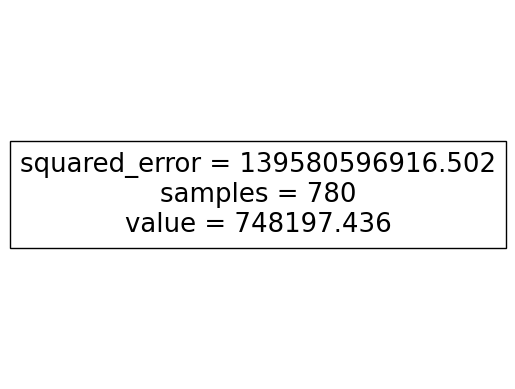

In [3]:
# 3. plotting tree:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


cart = tree.DecisionTreeRegressor(min_samples_leaf= 500)
cart = cart.fit(X_train, Y_train)

var_names = cart.feature_names_in_
plot_tree(cart, filled=True, feature_names=var_names)

# testing through min_samples_leaf from 1 - 25
r2_list = []
leaf_values = list(range(1, 26))

for leaf in leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, Y_train)
    y_hat = model.predict(X_test)
    r2 = r2_score(Y_test, y_hat)
    r2_list.append(r2)

best_leaf = leaf_values[r2_list.index(max(r2_list))]
best_r2 = max(r2_list)

print(f'Best min_sample_left value: {best_leaf} with R^2 of {best_r2:.3f}')

R^2 on test: 0.825
RMSE on test: 141536.54


[Text(0.5, 0.9, 'Body_Type_suv <= 0.5\nsquared_error = 139580596916.502\nsamples = 780\nvalue = 748197.436'),
 Text(0.25, 0.7, 'Make_Year <= 2016.5\nsquared_error = 60962502778.823\nsamples = 610\nvalue = 624813.115'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Make_Year <= 2013.5\nsquared_error = 23547942893.771\nsamples = 262\nvalue = 487458.015'),
 Text(0.0625, 0.3, 'Body_Type_hatchback <= 0.5\nsquared_error = 8641521600.0\nsamples = 100\nvalue = 387280.0'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Body_Type_hatchback <= 0.5\nsquared_error = 22730628257.888\nsamples = 162\nvalue = 549296.296'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Body_Type_sedan <= 0.5\nsquared_error = 64233064704.717\nsamples = 348\nvalue = 728224.138'),
 Text(0.3125, 0.3, 'Make_Renault <= 0.5\nsquared_error = 27024150874.316\nsamples = 229\nvalue = 632283.843'),
 Text(0.28125, 0.1, '\n  (...)  \n'

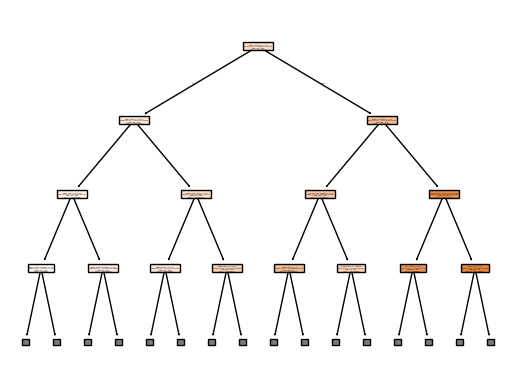

In [4]:
# 4. Regressing price by covariates/features:
from sklearn.metrics import mean_squared_error

# training model with min_sample_leaf = 5, based on last step:
model = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
model.fit(X_train, Y_train)

# predicitons:
y_hat = model.predict(X_test)

# evaluating with r2 scores:
r2 = r2_score(Y_test, y_hat)
rmse = np.sqrt(mean_squared_error(Y_test, y_hat))

print(f'R^2 on test: {r2:.3f}')
print(f'RMSE on test: {rmse:.2f}')

# plotting tree:
plot_tree(model, filled=True, feature_names=X.columns, max_depth=3)


<Axes: ylabel='Price'>

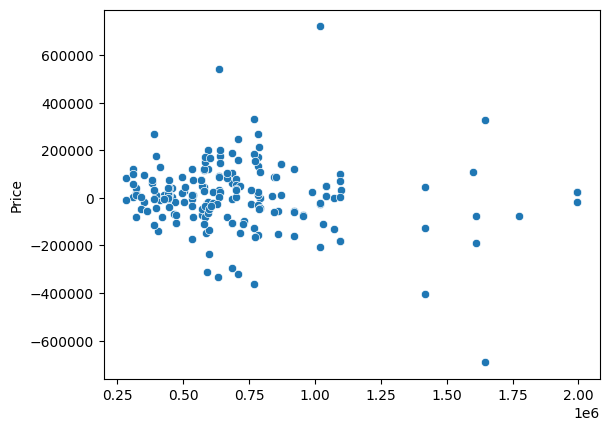

In [5]:
# Plotting residuals density:
residuals = Y_test - y_hat

import seaborn as sns

sns.scatterplot(x=y_hat, y=residuals)


<Axes: xlabel='Price', ylabel='Count'>

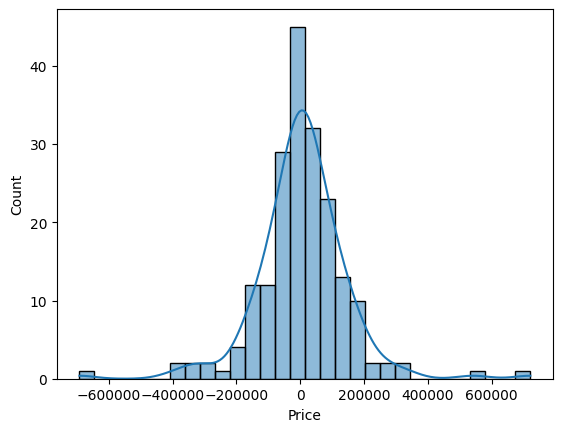

In [6]:

sns.histplot(residuals, kde=True, bins = 30)

Yes, the density curve is quite symmetric and is centered around 0 meaning the model is performing relatively well (not over or underfitting to a large degree).

In [7]:
# 5. Running linear regresion:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_hat_lin = linreg.predict(X_test)

# evaluating, calculating RMSE and r2
r2_lin = r2_score(Y_test, y_hat_lin)
rmse_lin = np.sqrt(mean_squared_error(Y_test, y_hat_lin))

print(f'Linear Regression r2 score: {r2_lin:.3}')
print(f"Linear Regression RMSE score: {rmse_lin:.3f}")

Linear Regression r2 score: 0.82
Linear Regression RMSE score: 143575.197


The tree model performed slightly better with an r2 score of 0.825 outperforming the linear regression of 0.820. Additionally, the RMSE score for the tree model was slightly lower with a score of 141536.54 compared to 143575.197.

<Axes: >

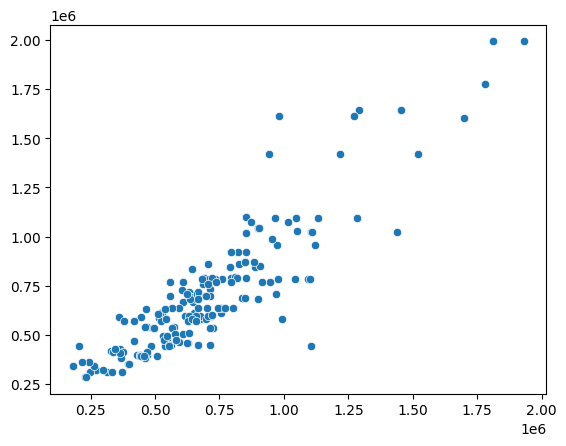

In [8]:
# 6. Making plots:
y_hat_tree = model.predict(X_test)

sns.scatterplot(x=y_hat_lin, y=y_hat_tree)



The plot shows a linear relationship between both models' predictions, meaning they are both demonstrating very similar predictions for the test samples. Overall, either model would perform well but if we were to look at the numerical evaluations, the tree model slightly edges out linear regression.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [9]:
# 1. Loading in dataset / printing out dimensions
bc_df = pd.read_csv('./data/Breast Cancer METABRIC.csv')
print(f'Observations by Features/Variables: {bc_df.shape}')
bc_df.head(10)

Observations by Features/Variables: (2509, 34)


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,MB-0010,78.77,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,1.0,Positve,...,Deceased,Positive,Yes,2.89,Recurred,Female,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
6,MB-0014,56.45,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.17,Not Recurred,Female,NaN,10.0,2.0,Living
7,MB-0020,70.00,Mastectomy,Breast Cancer,Breast Invasive Lobular Carcinoma,High,Yes,Normal,1.0,Negative,...,Deceased,Negative,Yes,11.74,Recurred,Female,ER-/HER2-,65.0,3.0,Died of Disease
8,MB-0022,89.08,Breast Conserving,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,No,claudin-low,1.0,Positve,...,Deceased,Negative,Yes,98.22,Not Recurred,Female,NaN,29.0,2.0,Died of Other Causes
9,MB-0025,76.24,NaN,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,126.32,Recurred,Female,NaN,34.0,2.0,NaN


In [13]:
# previewing col names:
bc_df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [11]:
# 2. Setting numeric and categorical columns and one-hot encoding
bc_numeric_cols = ['Tumor Size','Lymph nodes examined positive', 'Age at Diagnosis']
bc_cat_cols = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

bc_df_encoded = pd.get_dummies(bc_df[bc_cat_cols], drop_first=True)
X = pd.concat([bc_df[bc_numeric_cols], bc_df_encoded], axis=1)

[Text(0.5, 0.9, 'Age at Diagnosis <= 64.59\ngini = 0.489\nsamples = 1584\nvalue = [911, 673]\nclass = Deceased'),
 Text(0.25, 0.7, 'Lymph nodes examined positive <= 5.5\ngini = 0.495\nsamples = 919\nvalue = [414.0, 505.0]\nclass = Living'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Age at Diagnosis <= 57.765\ngini = 0.486\nsamples = 825\nvalue = [343, 482]\nclass = Living'),
 Text(0.0625, 0.3, 'Tumor Size <= 28.25\ngini = 0.463\nsamples = 539\nvalue = [196, 343]\nclass = Living'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Tumor Size <= 23.5\ngini = 0.5\nsamples = 286\nvalue = [147, 139]\nclass = Deceased'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Age at Diagnosis <= 53.585\ngini = 0.37\nsamples = 94\nvalue = [71, 23]\nclass = Deceased'),
 Text(0.3125, 0.3, 'Age at Diagnosis <= 46.67\ngini = 0.47\nsamples = 45\nvalue = [28, 17]\nclass = Deceased'),
 Text(0.28125, 0.1, '\n  

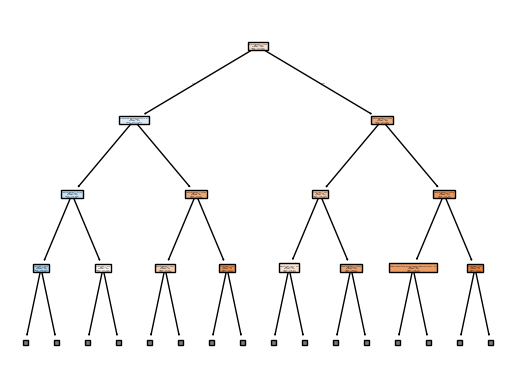

In [18]:
# 3. dropping values and setting target and feature vars:
bc_df_clean = bc_df.dropna(subset=['Overall Survival (Months)'])
X = pd.concat([bc_df_clean[bc_numeric_cols], pd.get_dummies(bc_df_clean[bc_cat_cols], drop_first=True)], axis=1)
y = bc_df_clean['Overall Survival Status']

# splitting data into test/train:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# setting min_leaf to 10 and fitting model:
from sklearn.tree import DecisionTreeClassifier
bc_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
bc_model.fit(X_train, Y_train)

# plotting dendrogram:
plot_tree(bc_model, filled=True, feature_names=X.columns, class_names=bc_model.classes_, max_depth=3)


TPR: 1.0
TNR: nan
0.5994962216624685


/var/folders/f0/rhgwtvsd01lfbqlqp_ts85wh0000gn/T/ipykernel_4157/3177862893.py:12: RuntimeWarning: invalid value encountered in scalar divide
  TNR = TN / (TN + FP)


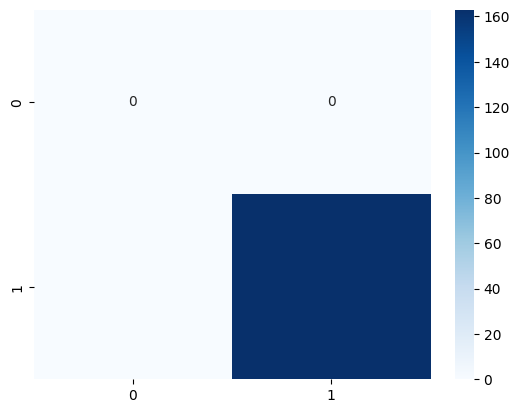

In [23]:
# 4. Confusion Matrix:
y_bc_hat = bc_model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# matrix:
cm = confusion_matrix(Y_test, y_bc_hat, labels=["Alive", "Deceased"])
TN, FP, FN, TP = cm.ravel()

# computing TPR and TNR:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print(f"TPR: {TPR}")
print(f"TNR: {TNR}")

sns.heatmap(cm, annot=True, cmap='Blues')
accuracy = accuracy_score(Y_test, y_hat_)
print(accuracy)

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?